Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import lightgbm as lgbm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

Pre-processing

In [4]:
data = pd.read_csv('../Datasets/2019.csv')

In [5]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
data.shape

(156, 9)

In [7]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
data[data['Perceptions of corruption'] > 0.4]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411


In [10]:
data[data['Perceptions of corruption'] < 0.01]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006
47,48,Romania,6.070,1.162,1.232,0.825,0.462,0.083,0.005
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
77,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006
96,97,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004


<AxesSubplot:xlabel='Score', ylabel='GDP per capita'>

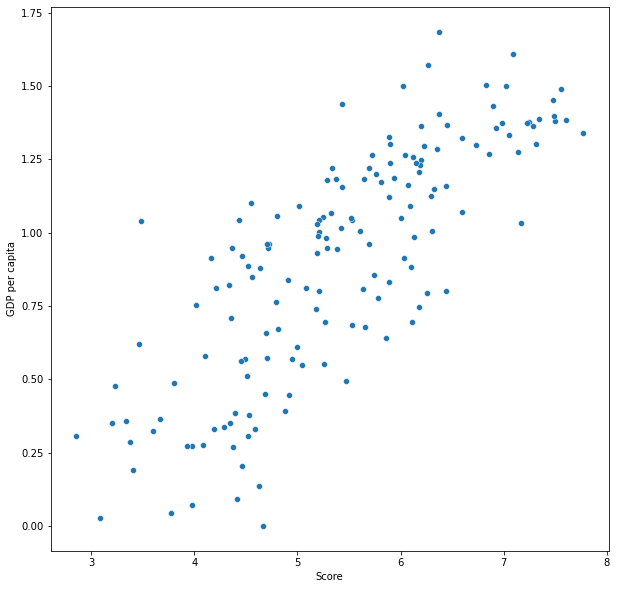

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Score", y="GDP per capita", data=data)

<AxesSubplot:xlabel='Score', ylabel='Healthy life expectancy'>

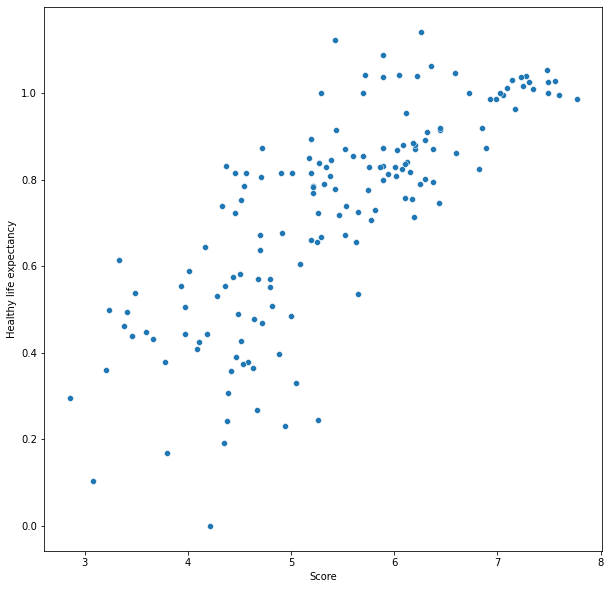

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Score", y="Healthy life expectancy", data=data)

<AxesSubplot:xlabel='Score', ylabel='Generosity'>

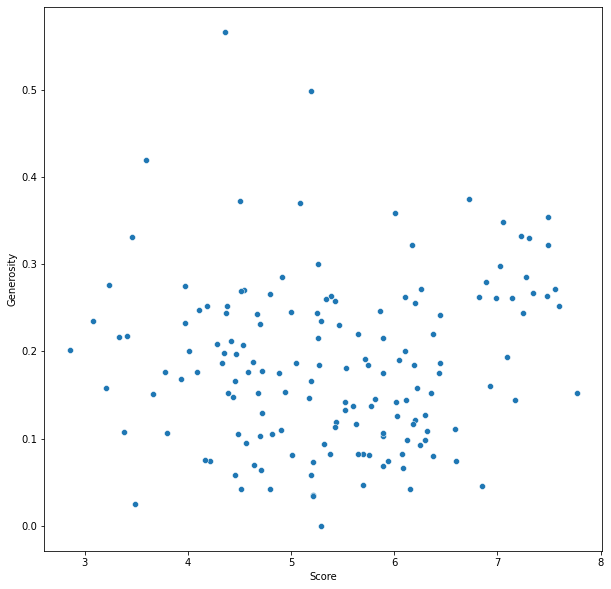

In [13]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Score", y="Generosity", data=data)

<AxesSubplot:xlabel='Score', ylabel='Perceptions of corruption'>

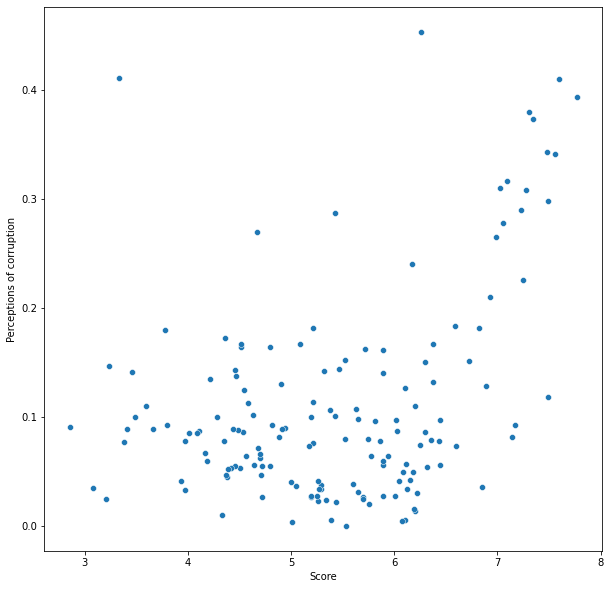

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Score", y="Perceptions of corruption", data=data)

<AxesSubplot:xlabel='Score', ylabel='Freedom to make life choices'>

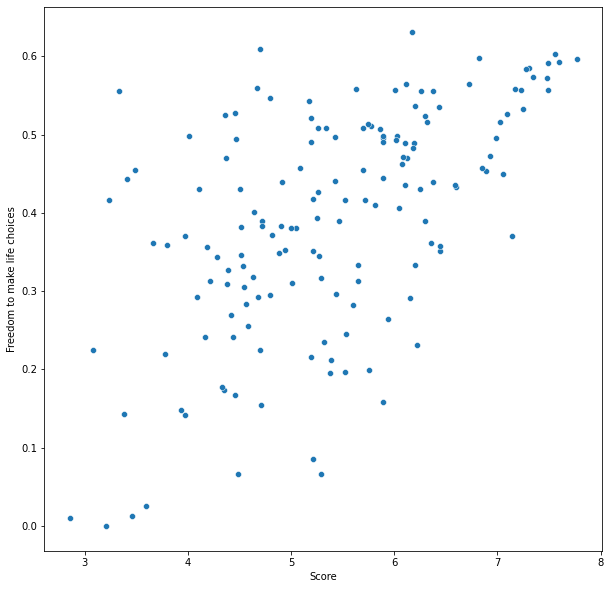

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Score", y="Freedom to make life choices", data=data)

<AxesSubplot:>

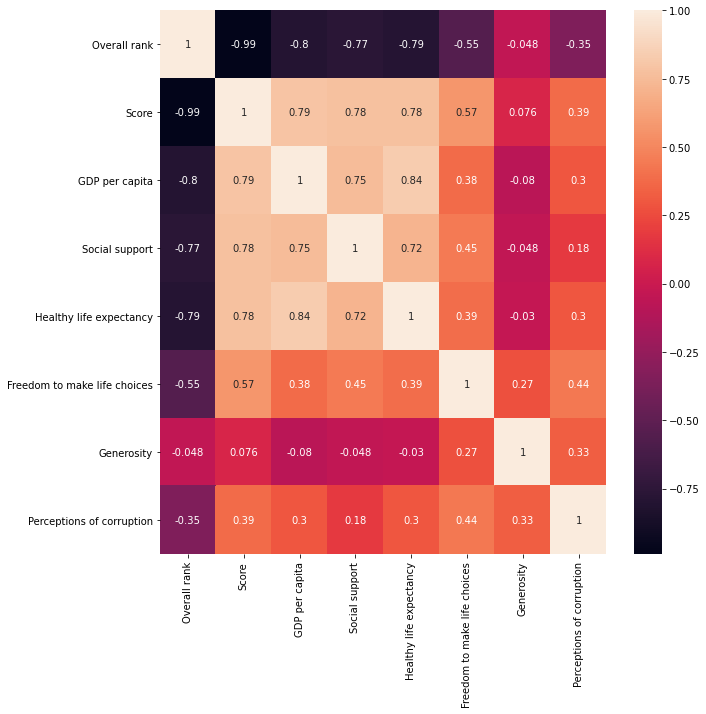

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [17]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [18]:
X = data[['GDP per capita',
       'Social support', 'Healthy life expectancy']]

In [19]:
X

,GDP per capita,Social support,Healthy life expectancy
0,1.340,1.587,0.986
1,1.383,1.573,0.996
2,1.488,1.582,1.028
3,1.380,1.624,1.026
4,1.396,1.522,0.999
...,...,...,...
151,0.359,0.711,0.614
152,0.476,0.885,0.499
153,0.350,0.517,0.361
154,0.026,0.000,0.105


In [20]:
y = data['Score']

In [21]:
y

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

Model

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
y_test = np.array(y_test)

In [24]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
reg_lm = linear_model.LinearRegression()
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

reg_lm.fit(X_train_poly, y_train)

LinearRegression()

In [26]:
y_pred_lm = reg_lm.predict(X_test_poly)

In [27]:
mean_absolute_error(y_test, y_pred_lm)

0.5009910399816009

In [28]:
parameters_rf = {'n_estimators':range(10,400,5),
                'max_depth':range(2,8,2)}

In [29]:
rf = RandomForestRegressor()

reg_rf = RandomizedSearchCV(rf, parameters_rf, random_state=0, cv=4)

reg_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(2, 8, 2),
                                        'n_estimators': range(10, 400, 5)},
                   random_state=0)

In [30]:
y_pred_rf = reg_rf.predict(X_test)

In [31]:
mean_absolute_error(y_test, y_pred_rf)

0.4709781287771527

In [2]:
from lightgbm import LGBMRegressor

gbm = LGBMRegressor()

parameters_lgbm = {'learning_rate':(0.1,0.01), 'n_estimators':range(40,600,10),
                'max_depth':range(2,12,2),
              }

In [33]:
clf_lgbm = RandomizedSearchCV(gbm, parameters_lgbm, random_state=0, cv=4)

clf_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=LGBMRegressor(),
                   param_distributions={'learning_rate': (0.1, 0.01),
                                        'max_depth': range(2, 12, 2),
                                        'n_estimators': range(40, 600, 10)},
                   random_state=0)

In [34]:
y_pred_lgbm = clf_lgbm.predict(X_test)

In [36]:
mean_absolute_error(y_test, y_pred_lgbm)

0.45439211764506293

Linear Regression Polynomial - 0.4674133248783266
Random Forest Regressor - 0.4839446933279256
LightGbm Regressor - 0.4460243166795468

In [37]:
y_pred_all = (y_pred_lm*2) + (y_pred_rf*3) + (y_pred_lgbm*0.5)

In [38]:
mean_absolute_error(y_test, y_pred_all)

24.45988206287401